In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df = pd.read_csv("EastWestAirlines.csv")
print(df.shape)
print(df.info())
df.head()

(3999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
'''
columns having continous data => [
    "Balance",
    "Qual_miles",
    "cc1_miles",
    "cc2_miles",
    "cc3_miles",
    "Bonus_miles",
    "Flight_miles_12mo"
]
'''

'\ncolumns having continous data => [\n    "Balance",\n    "Qual_miles",\n    "cc1_miles",\n    "cc2_miles",\n    "cc3_miles",\n    "Bonus_miles",\n    "Flight_miles_12mo"\n]\n'

# 1. EDA

In [ ]:
# 1. Handling imbalanced data
print(df.isnull().sum())
print(df.duplicated().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64
0


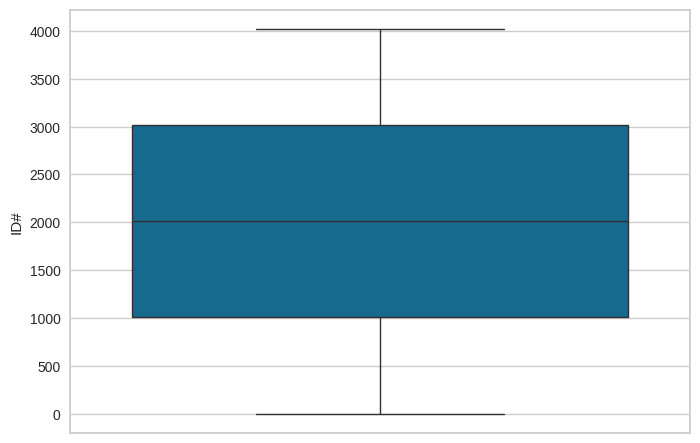

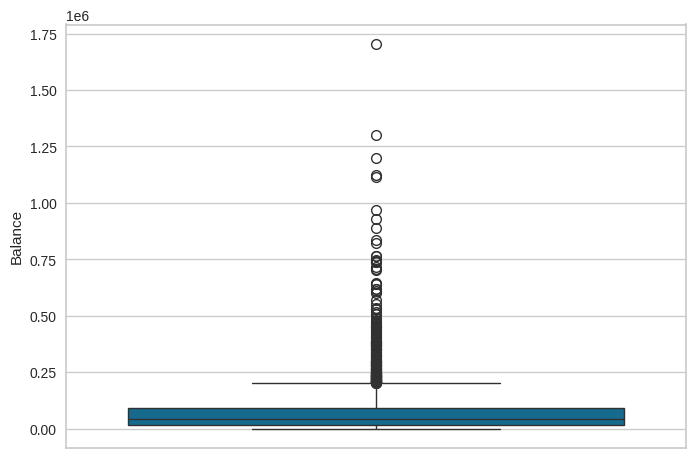

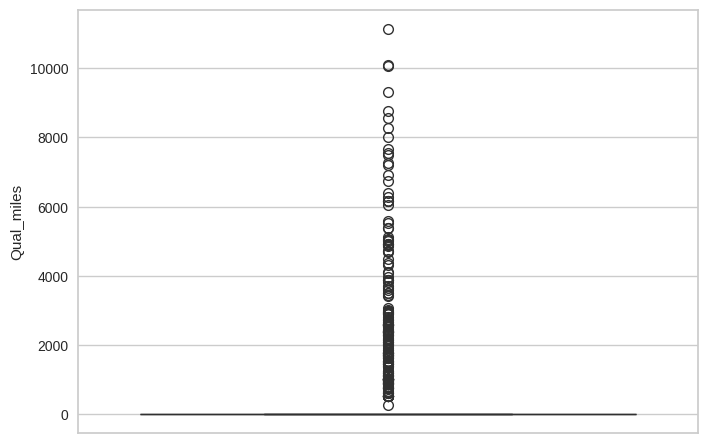

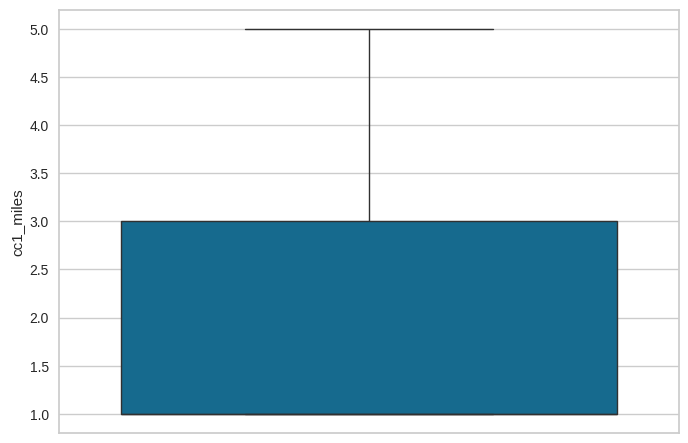

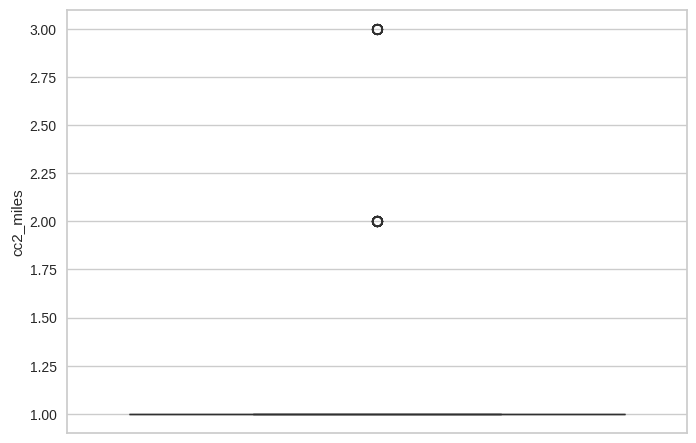

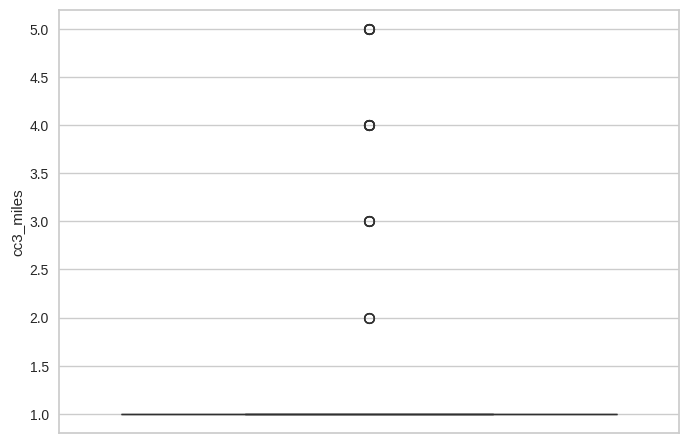

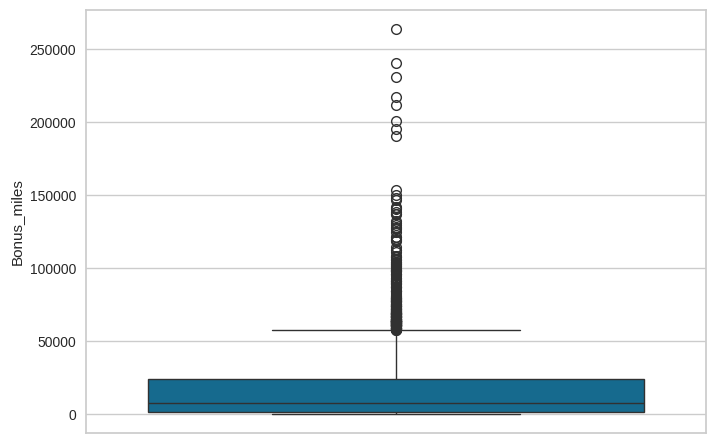

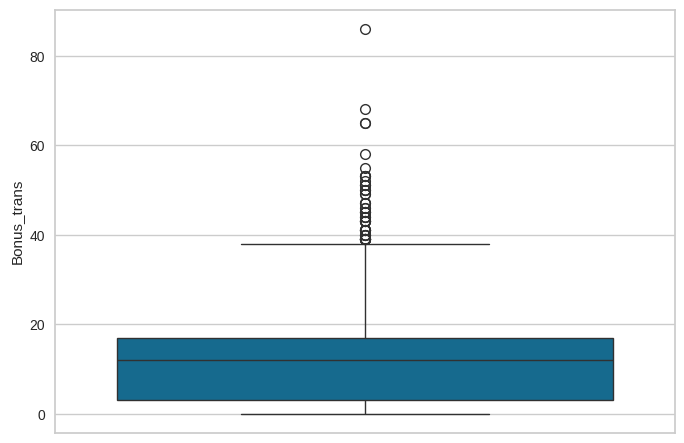

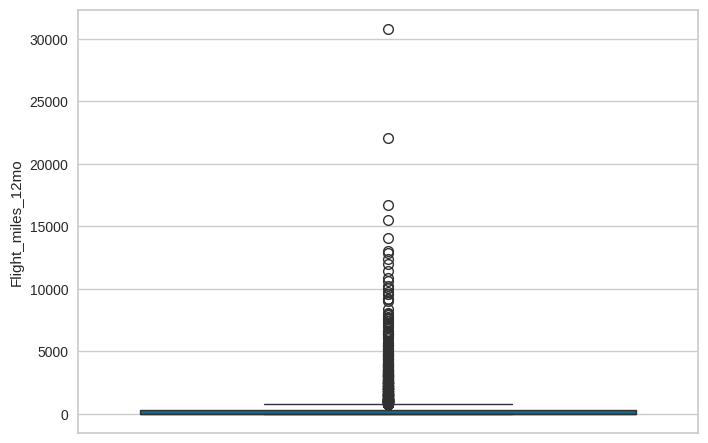

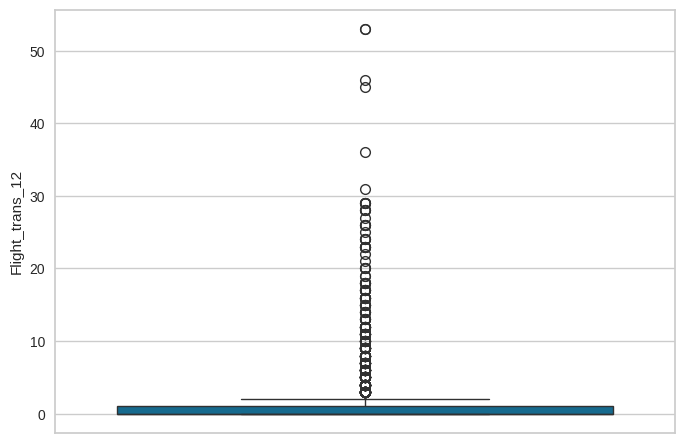

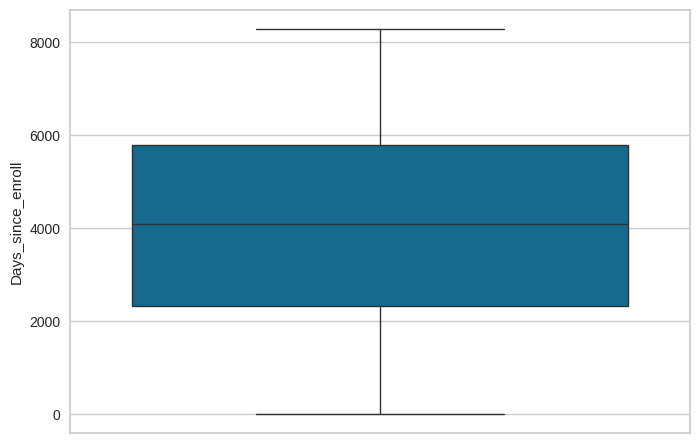

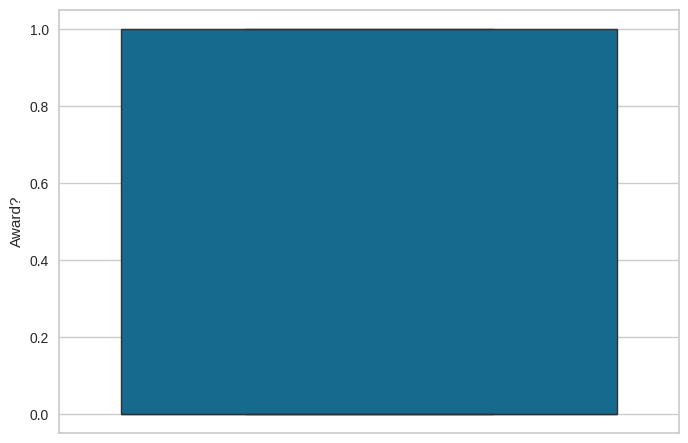

In [ ]:
for col in df.select_dtypes(["int", "float"]).columns:
    sns.boxplot(data = df, y = col)
    plt.show()

In [ ]:
def replace_outliers(df):
    def replace(col):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_extreme = Q1 - 1.5*IQR
        upper_extreme = Q3 + 1.5*IQR
        df[col] = df[col].apply(lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x)

    for c in df.select_dtypes(include=["int", "float"]).columns:
        replace(c)

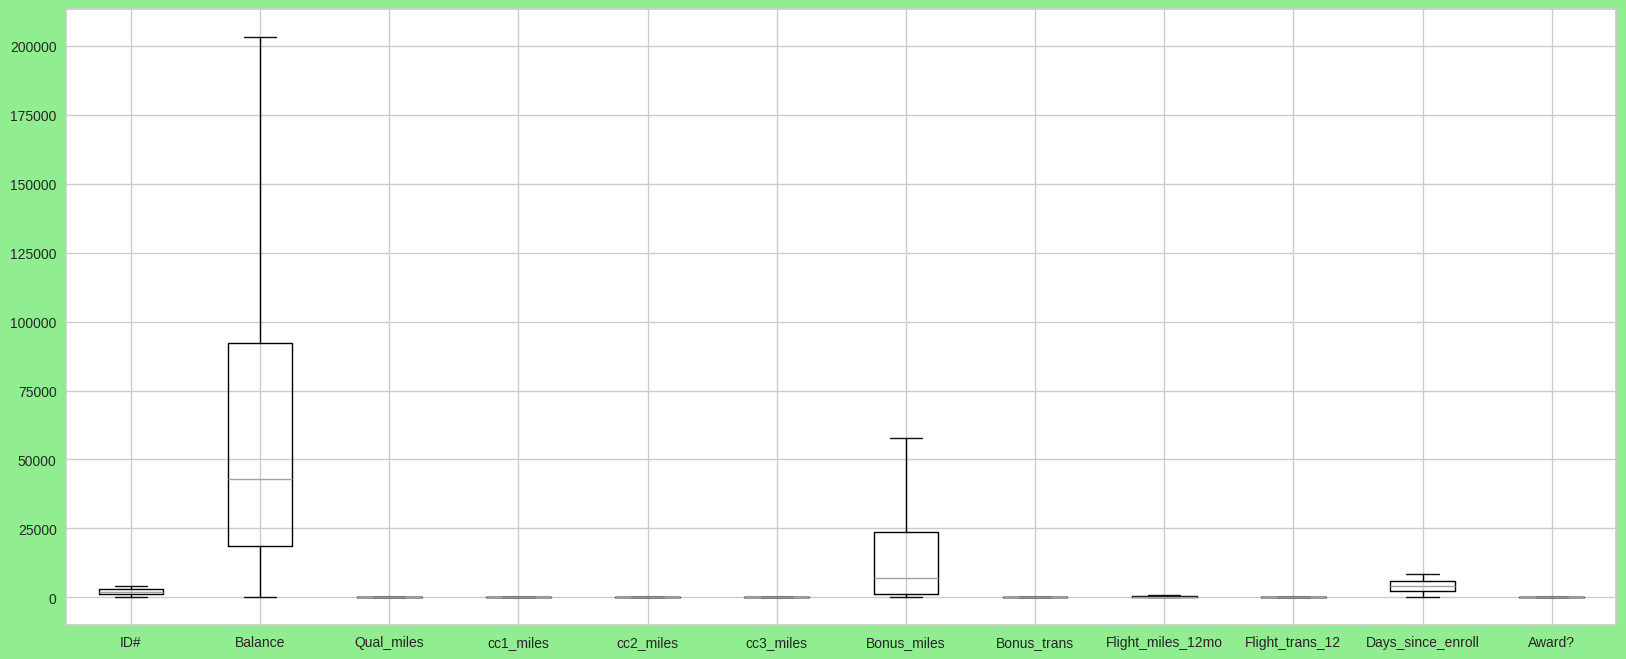

In [ ]:
plt.figure(figsize=(20,8), facecolor="lightgreen")
replace_outliers(df)
df.boxplot()
plt.show()

In [ ]:
df.drop(columns=["ID#"], inplace=True)

In [ ]:
numerical_columns = df.select_dtypes(["int", "float"]).columns

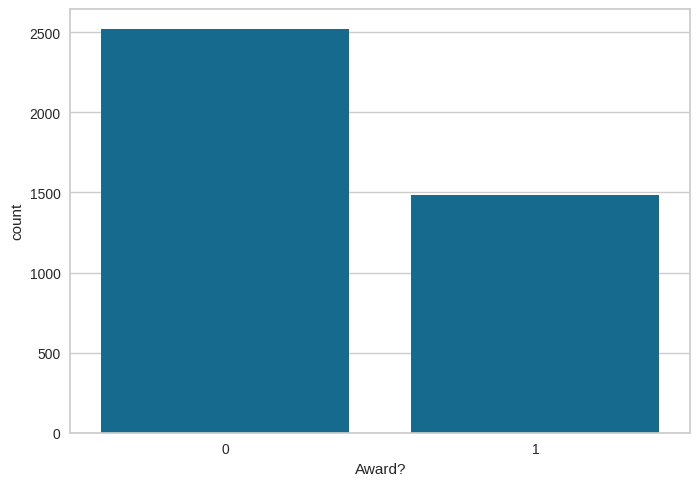

In [ ]:
# 2. Visualization
sns.countplot(data=df,x="Award?")
plt.show()

Text(0.5, 1.0, 'Days_since_enroll vs Bonus_miles')

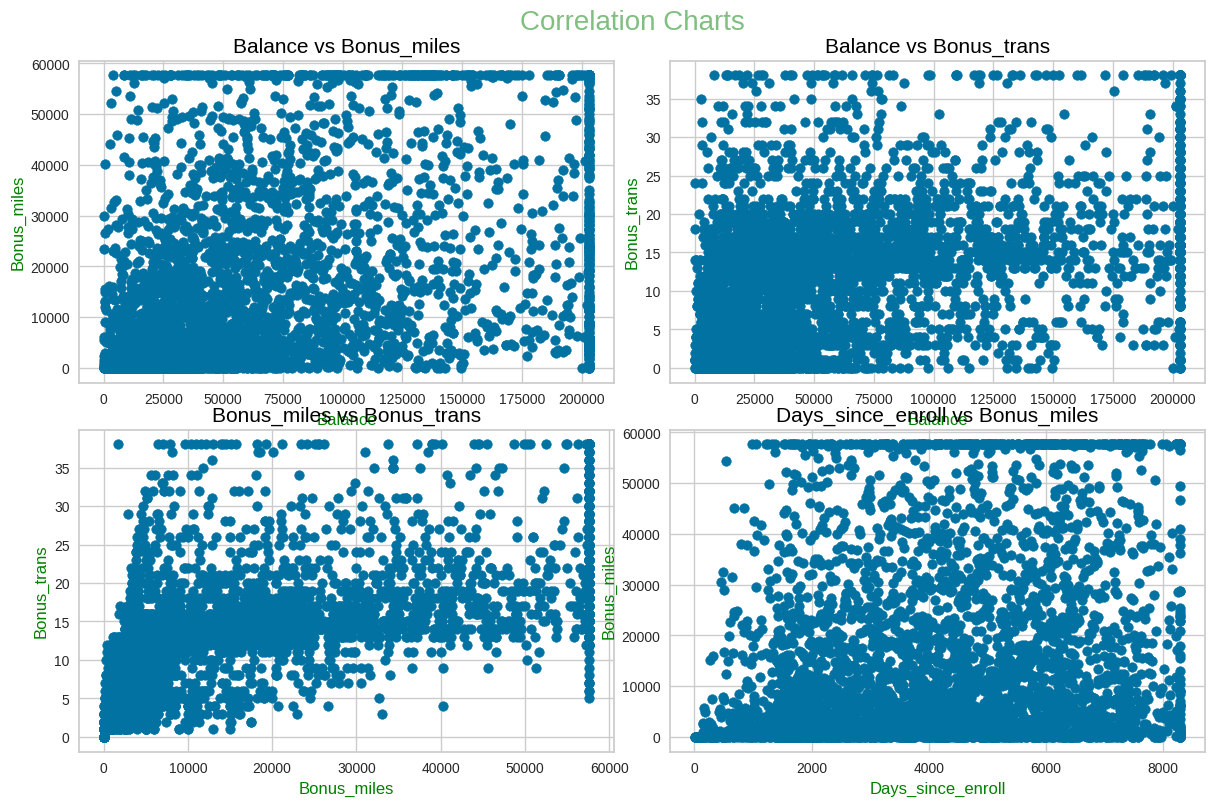

In [ ]:
# Subplot


fig, axs = plt.subplots(2,2,figsize=(12,8))
plt.suptitle("Correlation Charts", size=20, color="green", fontweight="light", alpha=0.5)
plt.tight_layout()

axs[0,0].scatter(df["Balance"], df["Bonus_miles"])
axs[0,0].set_xlabel("Balance", color="green", size=12)
axs[0,0].set_ylabel("Bonus_miles", color="green", size=12)
axs[0,0].set_title("Balance vs Bonus_miles", color="black", size=15)

axs[0,1].scatter(df["Balance"], df["Bonus_trans"])
axs[0,1].set_xlabel("Balance", color="green", size=12)
axs[0,1].set_ylabel("Bonus_trans", color="green", size=12)
axs[0,1].set_title("Balance vs Bonus_trans", color="black", size=15)

axs[1,0].scatter(df["Bonus_miles"], df["Bonus_trans"])
axs[1,0].set_xlabel("Bonus_miles", color="green", size=12)
axs[1,0].set_ylabel("Bonus_trans", color="green", size=12)
axs[1,0].set_title("Bonus_miles vs Bonus_trans", color="black", size=15)

axs[1,1].scatter(df["Days_since_enroll"], df["Bonus_miles"])
axs[1,1].set_xlabel("Days_since_enroll", color="green", size=12)
axs[1,1].set_ylabel("Bonus_miles", color="green", size=12)
axs[1,1].set_title("Days_since_enroll vs Bonus_miles", color="black", size=15)

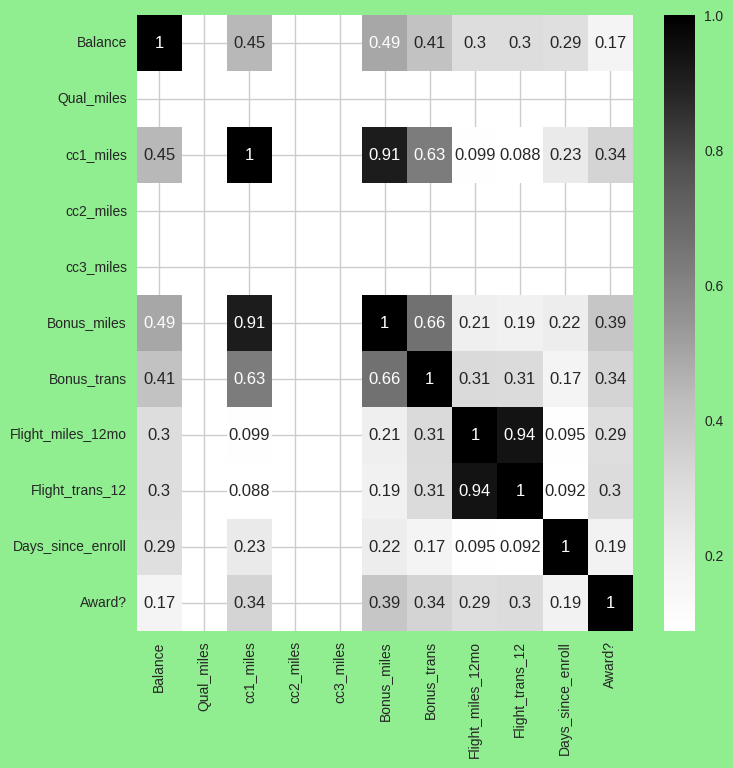

In [ ]:
corrs=df[numerical_columns].corr()
plt.figure(figsize=(8,8), facecolor="lightgreen")
sns.heatmap(corrs, annot=True, cmap=plt.cm.Greys)
plt.show()

In [ ]:
# 3. Data Splitting

features = df.drop(columns = ["Award?"])
target = df["Award?"]

In [ ]:
vif = pd.DataFrame()
vif["Features"] = features.columns
vif["VIF_SCORES"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

vif.sort_values(ascending=False, by="VIF_SCORES")

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Features,VIF_SCORES
8,Flight_trans_12,9.073894
7,Flight_miles_12mo,9.063617
5,Bonus_miles,6.987210
2,cc1_miles,6.474678
6,Bonus_trans,1.945899
0,Balance,1.469422
9,Days_since_enroll,1.107192
4,cc3_miles,0.000000
3,cc2_miles,0.000000
1,Qual_miles,NaN


In [ ]:
features.drop(columns=["cc3_miles","cc2_miles","Qual_miles"], inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=100, stratify=df["Award?"])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3199, 7)
(3199,)
(800, 7)
(800,)


In [ ]:
# 4. Scaling

std_sca = StandardScaler()
cols = [
    "Balance",
    "cc1_miles",
    "Bonus_miles",
    "Flight_miles_12mo"
]

x_train[cols] = std_sca.fit_transform(x_train[cols])
x_test[cols] = std_sca.transform(x_test[cols])

x_train_ = x_train.copy()
x_test_ = x_test.copy()
x_train.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
2733,-0.974085,-0.779236,-0.858307,0.0,-0.608041,0.0,2277
536,-0.802752,-0.779236,-0.609615,3.0,1.084402,1.0,6576
711,-0.280453,1.392172,1.417174,24.0,-0.608041,0.0,6294
2562,0.695889,0.668369,0.044281,12.0,-0.608041,0.0,2830
1312,-0.793399,-0.779236,-0.858307,0.0,-0.608041,0.0,4994


# 2. Clustering with K-Means and DBScan

In [ ]:
# 1. Clustering with KMeans
kmeans = KMeans(n_clusters=2)
clusters_kmeans = kmeans.fit(x_train)

In [ ]:
len(clusters_kmeans.labels_), np.unique(clusters_kmeans.labels_)

(3199, array([0, 1], dtype=int32))

In [ ]:
x_train.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
2733,-0.974085,-0.779236,-0.858307,0.0,-0.608041,0.0,2277
536,-0.802752,-0.779236,-0.609615,3.0,1.084402,1.0,6576
711,-0.280453,1.392172,1.417174,24.0,-0.608041,0.0,6294
2562,0.695889,0.668369,0.044281,12.0,-0.608041,0.0,2830
1312,-0.793399,-0.779236,-0.858307,0.0,-0.608041,0.0,4994


In [ ]:
x_train_["Kmeans cluster"] = clusters_kmeans.labels_
x_train_.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Kmeans cluster
2733,-0.974085,-0.779236,-0.858307,0.0,-0.608041,0.0,2277,1
536,-0.802752,-0.779236,-0.609615,3.0,1.084402,1.0,6576,0
711,-0.280453,1.392172,1.417174,24.0,-0.608041,0.0,6294,0
2562,0.695889,0.668369,0.044281,12.0,-0.608041,0.0,2830,1
1312,-0.793399,-0.779236,-0.858307,0.0,-0.608041,0.0,4994,0


In [ ]:
silhouette_score(x_train, clusters_kmeans.labels_)

np.float64(0.6042299486355125)

In [ ]:
inertia_values = []
for i in range(1,11):
    kmeans_ = KMeans(n_clusters=i)
    kmeans_.fit(x_train)
    inertia_values.append(kmeans_.inertia_)

inertia_values

[13535468780.503437,
 3793407870.401996,
 1719285921.7895095,
 1070776200.7465762,
 703037876.6731517,
 498600783.76735365,
 379066191.11480707,
 273137307.79742223,
 220185391.05096492,
 172750017.4658637]

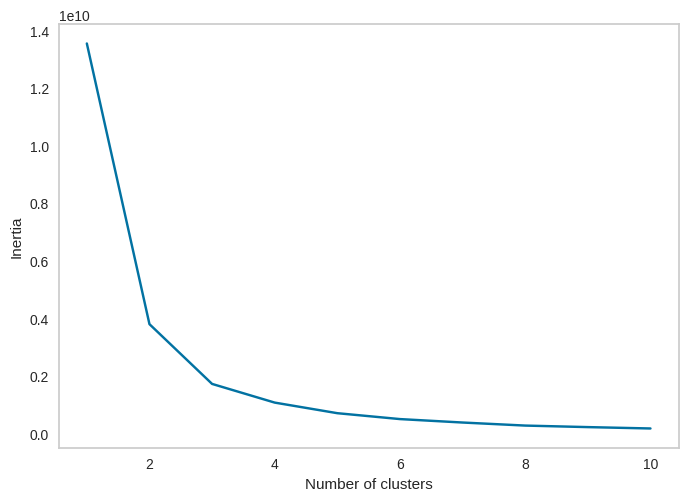

In [ ]:
plt.plot(range(1,11),inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()

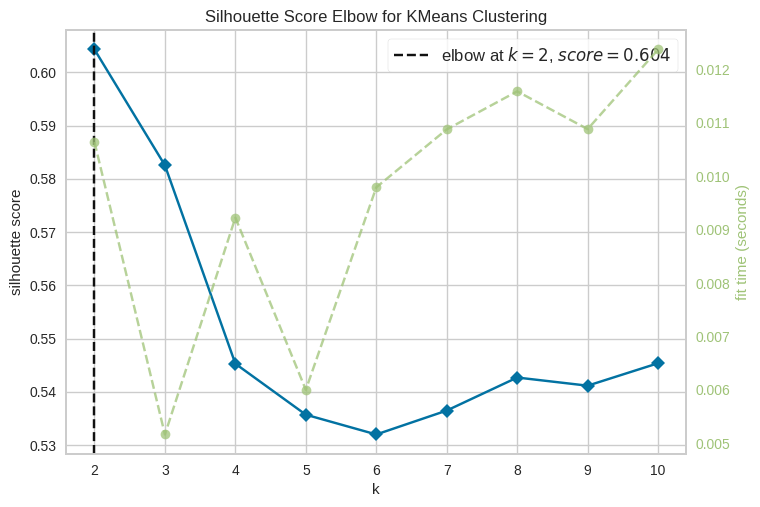

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
visualizer= KElbowVisualizer(KMeans(),k=(2,11),metric='silhouette')
visualizer.fit(x_train)
visualizer.show()

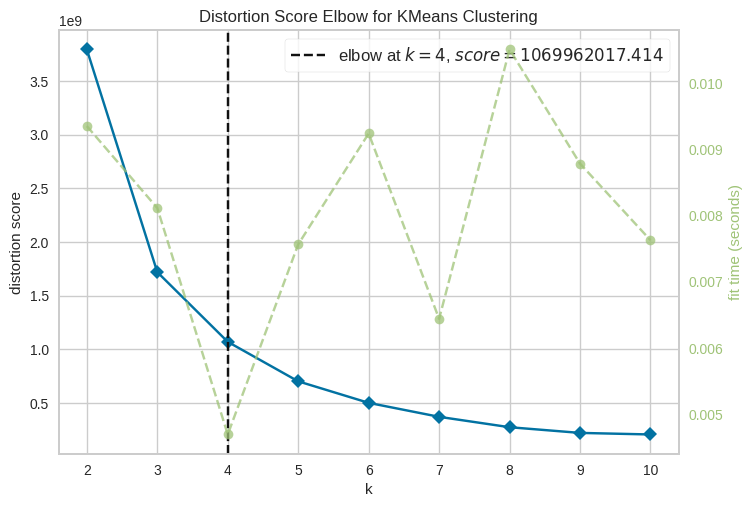

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer= KElbowVisualizer(KMeans(),k=(2,11),metric='distortion')
visualizer.fit(x_train)
visualizer.show()

In [ ]:
# 2. DB Scan
nn = NearestNeighbors(n_neighbors=20).fit(features)
nn

NearestNeighbors(n_neighbors=20)

In [ ]:
distance, index = nn.kneighbors(features)
distance.shape

(3999, 20)

In [ ]:
print(distance[0])
print(index[0])

[   0.          652.45306345  865.86835027  976.59625742 1076.26669557
 1669.08328133 1689.0026643  2061.71530527 2331.86641984 2429.17208118
 2534.52421571 2547.9016857  2581.82145006 2609.53559087 2687.76617287
 2848.32003118 2885.63857751 2920.95549435 2963.00067499 3052.62624637]
[   0  661  558  300  898  755 1263  399 1251 1603  655  921 1472 1423
 1720 1118 2095  707  463 1487]


In [ ]:
sorted_distance = np.sort(distance, axis=0) #axis = 0, sorts column wise

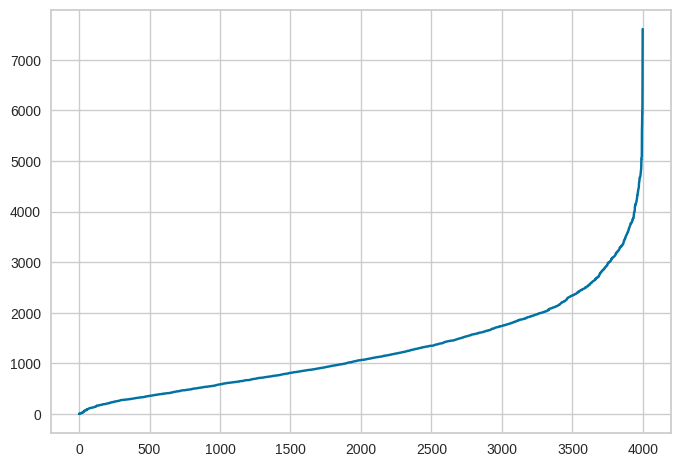

In [ ]:
plt.plot(sorted_distance[:,1])

In [ ]:
scores = []
for eps in [0.075,0.1,0.2,0.3,0.4,0.5,0.6]:
  for min_node in range(2,12):
    labels = DBSCAN(eps=eps, min_samples=min_node).fit(x_train).labels_
    if len(np.unique(labels)) < 2:
      continue
    score = silhouette_score(x_train, labels)
    scores.append([eps, min_node, score])


eps, min_node, score = sorted(scores, key = lambda x: x[2], reverse=True)[0]
print(eps, min_node, score)

0.3 3 0.3065679336007989


In [ ]:
'''
The clustering with Kmeans have produced better results than DB Scan clustering.

1) K Means
- Uses 2 as the number of clusters

2) DB Scan
- Used 0.3 as the epsilon value and 3 as the minimum number of nodes.

K-Means produced better clustering results because the airline customer data naturally forms well separated usage tiers based on spending and engagement.
The centroid based approach of K-Means effectively captured these patterns, resulting in clear and interpretable clusters representing low-value and high-value customers.

DBSCAN underperformed because the dataset lacks strong density separations and contains gradual transitions between customer types.
As a result, DBSCAN either merged clusters or labeled many points as noise, reducing interpretability.

'''

'\nThe clustering with Kmeans have produced better results than DB Scan clustering.\n\n1) K Means \n- Uses 2 as the number of clusters\n\n2) DB Scan \n- Used 0.3 as the epsilon value and 3 as the minimum number of nodes.\n\nK-Means produced better clustering results because the airline customer data naturally forms well separated usage tiers based on spending and engagement.\nThe centroid based approach of K-Means effectively captured these patterns, resulting in clear and interpretable clusters representing low-value and high-value customers.\n\nDBSCAN underperformed because the dataset lacks strong density separations and contains gradual transitions between customer types.\nAs a result, DBSCAN either merged clusters or labeled many points as noise, reducing interpretability. \n  \n'

In [ ]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
